<a href="https://colab.research.google.com/github/fasyamp/ML_CaseBased2/blob/main/ML_CaseBased2_With_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering the Countries by using Unsupervised Learning for HELP International**

Tujuan:
Untuk mengkategorikan negara-negara dengan menggunakan faktor sosio-ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan.

Goals : Meng-kategorikan negara-negara tersebut menggunakan beberapa faktor sosial-ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian menyarankan negara-negara yang paling perlu difokuskan oleh CEO.

**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

**Import File**

In [ ]:
countrydata = pd.read_csv('https://raw.githubusercontent.com/fasyamp/ML_CaseBased2/main/Country-data.csv')
datadict = pd.read_csv('https://raw.githubusercontent.com/fasyamp/ML_CaseBased2/main/data-dictionary.csv')

**Isi dari sheet Data Dictionary**

In [ ]:
# Menampilkan isi dari datadict
for i in range(len(datadict['Column Name'])):
    print(datadict['Column Name'][i],'\n\t',datadict['Description'][i])

country 
	 Name of the country
child_mort 
	 Death of children under 5 years of age per 1000 live births
exports 
	 Exports of goods and services per capita. Given as %age of the GDP per capita
health 
	 Total health spending per capita. Given as %age of GDP per capita
imports 
	 Imports of goods and services per capita. Given as %age of the GDP per capita
Income 
	 Net income per person
Inflation 
	 The measurement of the annual growth rate of the Total GDP
life_expec 
	 The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer 
	 The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp 
	 The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
countrydata

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Info dari Country Data**

In [ ]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
countrydata.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**Preprocessing**

In [ ]:
countrydata.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
data = countrydata.drop(['country'],axis=1)

In [ ]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


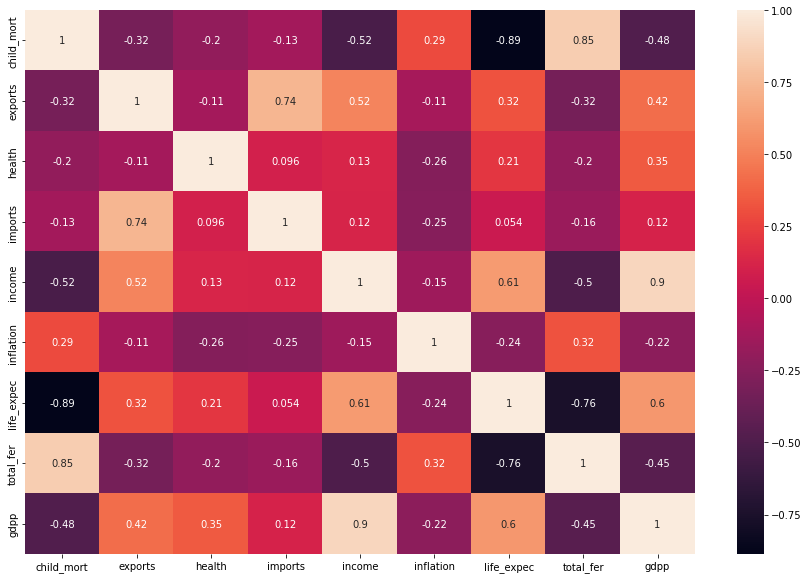

In [ ]:
# Korelasi Antar Data
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

In [ ]:
#Box Plotting
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=data.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
s=sns.boxplot(y=data.exports,ax=ax[0,1])
ax[0, 1].set_title('Exports')
bp=sns.boxplot(y=data.health,ax=ax[0, 2])
ax[0, 2].set_title('Health')
bp=sns.boxplot(y=data.income,ax=ax[1, 0])
ax[1, 0].set_title('Income per Person')
bp=sns.boxplot(y=data.inflation,ax=ax[1, 1])
ax[1, 1].set_title('Inflation')
bp=sns.boxplot(y=data.imports,ax=ax[1,2])
ax[1, 2].set_title('Imports')
s=sns.boxplot(y=data.life_expec,ax=ax[2, 0])
ax[2, 0].set_title('Life Expectancy')
s=sns.boxplot(y=data.total_fer,ax=ax[2,1])
ax[2, 1].set_title('Total Fertility')
s=sns.boxplot(y=data.gdpp,ax=ax[2, 2])
ax[2, 2].set_title('GDP per Capita')

plt.show()

**Scalling**

In [ ]:
# columns argument ==> akan digunakan pada saat ubah data ke dataframe
columns = data.columns

# the scaler to use will be 
scaler = MinMaxScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_data = scaler.fit_transform(data)
rescaled_data

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

Proses Scalling akan menghasilkan list array, maka akan dilakukan proses pengubahan menjadi dataframe kembali

In [ ]:
#Ubah kembali menjadi DataFrame

data_minmax = pd.DataFrame(data= rescaled_data , columns = columns)
data_minmax

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [ ]:
#Data asli
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Elbow Curve Method**

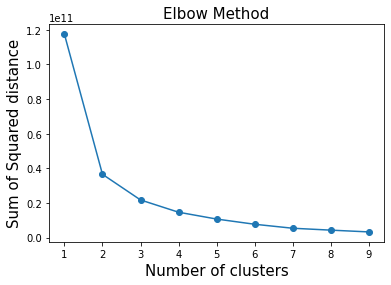

In [ ]:
# Elbow method berfungsi menentukan nilai k yang paling tepat

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(data)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

Berdasarkan plot di atas, maka diputuskan bahwa nilai k = 3

**KMeans**

In [ ]:
# KMeans with Library
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(data_minmax)
KMeans(n_clusters=3, random_state=0)

#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    86
0    46
2    35
dtype: int64

In [ ]:
data_minmax['Cluster'] = kmeans.labels_
data_minmax.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1
5,0.057936,0.094006,0.390926,0.091610,0.145437,0.232049,0.861933,0.192429,0.096107,1
6,0.075463,0.103511,0.160970,0.260065,0.048967,0.110711,0.812623,0.085174,0.028529,1
7,0.010711,0.098509,0.430081,0.119782,0.327926,0.049626,0.984221,0.123028,0.493171,2
8,0.008277,0.256095,0.571162,0.274438,0.342396,0.046973,0.954635,0.045741,0.445447,2
9,0.178189,0.271103,0.252952,0.118632,0.123731,0.166436,0.729783,0.121451,0.053537,1


In [ ]:
# Akan digunakan pada visualisasi
countrydata['Cluster'] = kmeans.labels_

**Visualisasi KMeans**

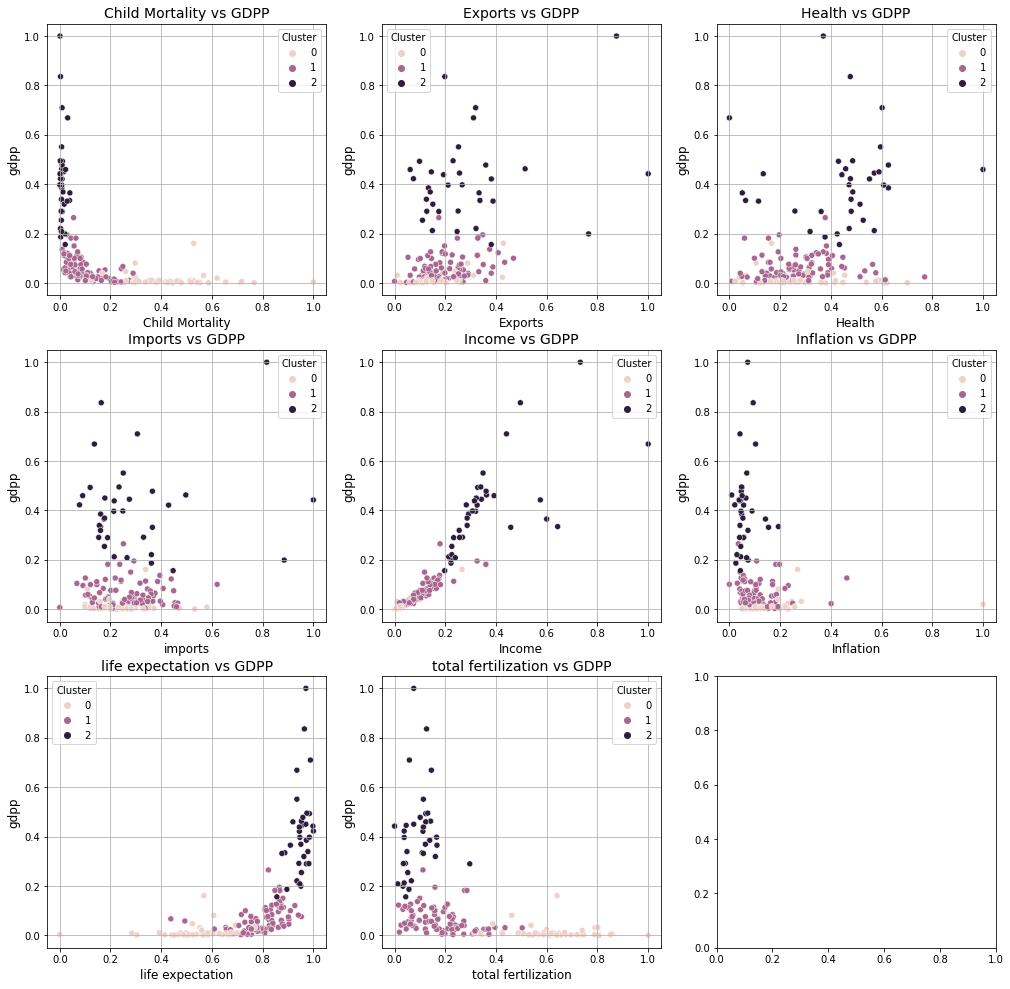

In [ ]:
fig = plt.subplots(nrows = 3, ncols = 3, figsize = (17,17))

#Visualisasi antara cluster child mortality dan gdpp
plt.subplot(3,3,1)
sns.scatterplot(data_minmax['child_mort'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Child Mortality vs GDPP", fontsize=14)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()
#plt.show()

#Visualisasi antara cluster exports dan gdpp
plt.subplot(3,3,2)
sns.scatterplot(data_minmax['exports'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Exports vs GDPP", fontsize=14)
plt.xlabel("Exports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()
#plt.show()

#Visualisasi antara cluster health dan gdpp
plt.subplot(3,3,3)
sns.scatterplot(data_minmax['health'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Health vs GDPP", fontsize=14)
plt.xlabel("Health", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster imports dan gdpp
plt.subplot(3,3,4)
sns.scatterplot(data_minmax['imports'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Imports vs GDPP", fontsize=14)
plt.xlabel("imports", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster income dan gdpp
plt.subplot(3,3,5)
sns.scatterplot(data_minmax['income'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Income vs GDPP", fontsize=14)
plt.xlabel("Income", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster inflation dan gdpp
plt.subplot(3,3,6)
sns.scatterplot(data_minmax['inflation'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("Inflation vs GDPP", fontsize=14)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster life expectation atau ekspetasi lamanya hidup dan gdpp
plt.subplot(3,3,7)
sns.scatterplot(data_minmax['life_expec'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("life expectation vs GDPP", fontsize=14)
plt.xlabel("life expectation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()

#Visualisasi antara cluster total fertilization / angka kelahiran dan gdpp
plt.subplot(3,3,8)
sns.scatterplot(data_minmax['total_fer'],data_minmax['gdpp'],hue='Cluster',data=data_minmax) 
plt.title("total fertilization vs GDPP", fontsize=14)
plt.xlabel("total fertilization", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.grid()



plt.show()

In [ ]:
# Visualisasi table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data_minmax, index=['Cluster'])
clusters_table

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,
0,0.441503,0.145970,0.013982,0.281447,0.248553,0.023376,0.150698,0.538333,0.621485
1,0.096522,0.201477,0.061934,0.273809,0.269448,0.097771,0.109223,0.798473,0.180324
2,0.011184,0.291771,0.409340,0.441730,0.295760,0.363321,0.062333,0.949620,0.093240


In [ ]:
data_minmax

In [ ]:
#Mengembalikan column country
cols = countrydata.columns
a = countrydata.pop("country")
data_minmax = data_minmax.join(a).reindex(columns=cols)

In [ ]:
data_minmax

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,0
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,1
163,Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,1
164,Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,1
165,Yemen,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,0


In [ ]:
#Visualisasi menggunakan pemetaan peta
import plotly.express as px

data_minmax['Cluster'].loc[data_minmax['Cluster'] == 0] = '0'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 1] = '1'
data_minmax['Cluster'].loc[data_minmax['Cluster'] == 2] = '2'

fig = px.choropleth(data_minmax[['country','Cluster']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Pemetaan Negara Yang Memerlukan Bantuan',
                    color = data_minmax['Cluster'],  
                    color_discrete_map = {'0':'Red',
                                        '1':'Yellow',
                                        '2':'Green'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Keterangan',legend_title_side = 'top',title_pad_l = 130,title_y = 1)
fig.show()

In [ ]:
# Mengelompokkan dan menginisiasi nilai cluster

sangat_butuh = data_minmax[data_minmax['Cluster']==0]['country']
mungkin_butuh = data_minmax[data_minmax['Cluster']==1]['country']
tidak_butuh = data_minmax[data_minmax['Cluster']==2]['country']

print("Total negara yang sangat membutuhkan bantuan   :",len(sangat_butuh))
print("Total negara yang mungkin membutuhkan bantuan  :",len(mungkin_butuh))
print("Total negara yang tidak membutuhkan bantuan    :",len(tidak_butuh))

list(sangat_butuh)

Total negara yang sangat membutuhkan bantuan   : 46
Total negara yang mungkin membutuhkan bantuan  : 86
Total negara yang tidak membutuhkan bantuan    : 35


['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [ ]:
# Daftar nama negara yang termasuk cluster 0 (Sangat Membutuhkan Bantuan)

list(sangat_butuh)

[]